<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp
from scipy.interpolate import lagrange

from scipy.constants import pi
from sympy import pi, oo, tan, symbols, integrate

## Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [3]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])

i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
df = pd.DataFrame()
df["tiempo(s)"] = t
df["corriente (A)"] = i
df

,tiempo(s),corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


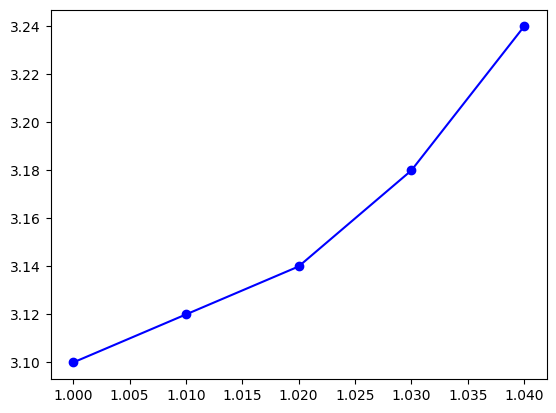

In [4]:
plt.plot(df["tiempo(s)"],df["corriente (A)"], "bo-" )

In [5]:
diff=np.gradient(i,t)
L = 0.98

R = 0.142

E = L * diff + R*i

df["E(t) (v)"] = E

df

,tiempo(s),corriente (A),E(t) (v)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


In [6]:
p= lagrange(t,df["corriente (A)"])
h = 1e-6
x=np.linspace(1,1.04,100)

def derivada_I(poli,x,h):
  diff_p = (1 / (2*h)) * ((-3)* p(x) + 4*p(x+h)- p(x + 2*h))
  return diff_p

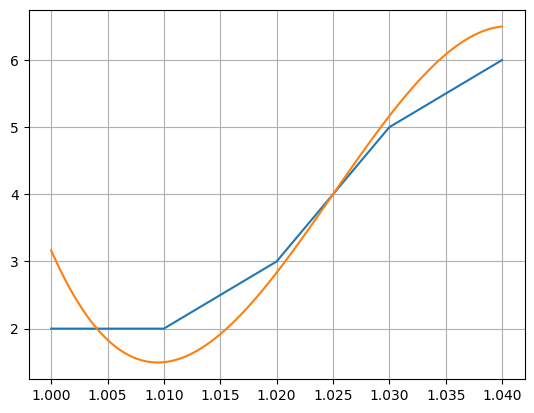

In [7]:
Y=derivada_I(p,x,h)
plt.plot(df["tiempo(s)"],diff)
plt.plot(x,Y)
plt.grid()

## Parte 2
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [8]:
def integral_trapz(f, a, b, n):
  x = np.linspace(a, b, n)
  s= 0
  for i in range(1, n, 1):
    s +=  f(x[i])
  I = ((b-a)/(2*n))* (f(a) + f(b) + 2*s)
  return I

In [19]:
tan_x=lambda x: 1 / ((np.tan(x))**(1/2))
a = 1e-8
b = np.pi/2
n=1000000
print(f"integral por el metodo del trapecio: {integral_trapz(tan_x,a,b,n)}")
print(f"integral por cuadratura gaussiana con librerias: {sc.integrate.quad(tan_x,a,b)[0]}")

integral por el metodo del trapecio: 2.2274525503672495
integral por cuadratura gaussiana con librerias: 2.22144146938126


###Metodo de Simpson

In [32]:
import sympy as sp
from sympy import pi, oo, tan, symbols, integrate

In [33]:
x1=1e-8
x2=np.pi/2
x_values = np.linspace(x1, x2, 10000000)
Y=tan_x(x_values)
sc.integrate.simpson(Y,x_values)

2.2214309594391692

$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


In [41]:
x = symbols("x")
f = (sp.cos(x))/x**3
I = integrate(f,(x,1,oo)).evalf()
I

0.0181176219806057

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

In [45]:
y = symbols("y")
g = 1 / sp.sqrt(1-(y**2))
I1 = integrate(g, (y,0,sp.sin(x))).evalf()
I1
I2=integrate(I,(x,0, pi/4)).evalf()
I2

0.308425137534042

## Parte 3
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

## Parte 4
The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [46]:
# 1) Los parametros iniciales que tomaremos serán:

I0 = 1  #Momento de inercia [kg*m^2]
theta = np.pi/4    #Angulo en radianes
l = 1  # Longitud del pendulo [m]
m = 1 # La masa en [kg]
g = 9.87  # Aceleracion gravitacional [m/s^2]


In [48]:
# 2) Calculo de la integral

def integral(phi):
  elip = 1 / np.sqrt(1 - k**2 * (np.sin(phi))**2)
  return elip

def integral_(k):
  N = 10000
  phi = np.linspace(0, np.pi/2, N)
  intg= np.trapz(integral(phi),phi)  #hallamos la integral con el metodo del trapecio
  return intg

In [49]:

P_0 = 2 * np.pi * np.sqrt(I0 /(m  *g))

k = np.sin(theta/2)


P = (2 * P_0 / np.pi )* integral_(k)

print("Periodo de oscilación para pequeñas oscilaciones:", P_0, "s")
print("Periodo de oscilación para NO pequeñas oscilaciones (Metodo Trapecio):", P,"s")


Periodo de oscilación para pequeñas oscilaciones: 1.999959918655044 s
Periodo de oscilación para NO pequeñas oscilaciones (Metodo Trapecio): 2.079905002863294 s


In [50]:
#Esta libreria puede calcular la integral eliptica

from scipy.special import ellipk

P = 2 * P_0 / np.pi * ellipk(k**2)  #a ellipk solo se le da el valor del parametro de la integral eliptica, que en este caso es K^2
print("Este es el valor del periodo P, usando una libreria que lo calcula directamente :",P,"s")

Este es el valor del periodo P, usando una libreria que lo calcula directamente : 2.079905002863294 s
